# 6월 1일

# 아보카도 가격 예측

## 데이터 정보 불러오기

### 사용 라이브러리 모음

In [2]:

# 사용 라이브러리

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from datetime import date

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yh-k4-main-수정용/data/avocado.csv', index_col=0)

#### 데이터 컬럼 설명

- type - 일반/유기농
- region - 지역
- Date - 위클리 데이터임
- AveragePrice - 평균 가격
- Total Volume - 그 주(week)에 팔린 총 개수
- 4046 등 숫자 - 농산물 코드 (미국)


In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
### 날짜가 뒤죽박죽 -->> 날짜로 정렬하기

df.sort_values('Date', inplace = True)

# inplace = True : 화면에서만 보여주지 말고 메모리에서까지 바꿔놔라

In [10]:
# 다시 확인해보기

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [11]:
# 뒤에서부터 보기

df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


In [ ]:
# 2015/1/4 ~ 2018/3/25 까지 데이터가 있음
# 중복 날짜가 있는데 이건 지역(region) 때문


#### 차트 그리기 준비과정

In [ ]:
### 날짜별로 아보카도 가격이 어떻게 변하는지 차트로 나타내보기


In [13]:
### 지역 확인하기

df['region'].nunique()

# 날짜별로 54개의 데이터가 있겠구나
# 날짜별로 묶어서 54개 주의 가격의 평균을 보여주는게 좋을듯하다

54

In [14]:
### 날짜별로 묶어서 54개 주의 가격의 평균 구하기

df.groupby('Date')['AveragePrice'].mean()
# 날짜별로 묶어서 -> 평균가격 컬럼의 -> 평균을 구하라

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [15]:
# 변수에 저장해주기 

df_date = df.groupby('Date')['AveragePrice'].mean()
df_date

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

#### 차트 그려보기

In [16]:
### 라이브러리 추가

import matplotlib.pyplot as plt


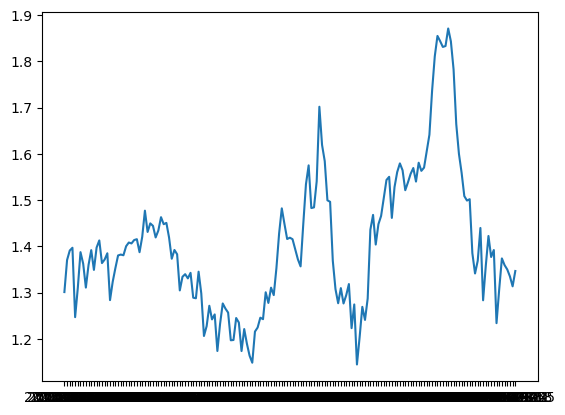

In [17]:
### 차트 그리기

plt.plot(df_date)
plt.show()     # -->> 이렇게 쓰면 메모리 내용은 안보여줌(차트만 보여주고 이상한 글자 안나옴)


# 대강의 가격 변화 양상은 알 수 있으나 보기에 힘듬 -->> 라이브러리 사용하면 보기에 좋다

In [18]:
### 연도별로 보기

df['year']

51    2015
51    2015
51    2015
51    2015
51    2015
      ... 
0     2018
0     2018
0     2018
0     2018
0     2018
Name: year, Length: 18249, dtype: int64

In [19]:
# 연도별 데이터는 몇개나 있을까

df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [ ]:


### 연도별 데이터 몇개있는지 차트 그려보기


In [20]:
### 사용 라이브러리

import seaborn as sb

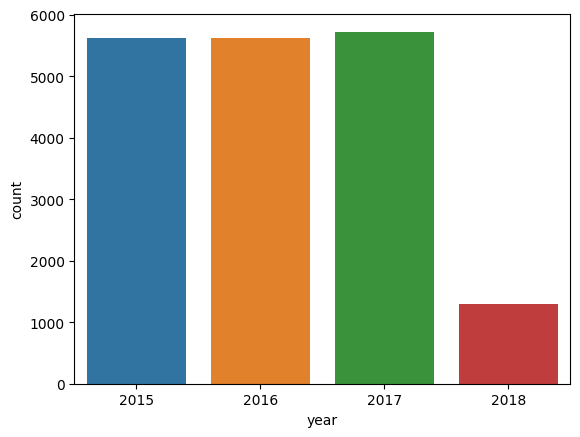

In [21]:
# 카운트플롯 그리기

sb.countplot(data = df, x = 'year')
plt.show()

#### 날짜 컬럼이 년월일만 되어있는데 요일 정보를 알고 싶을때

In [ ]:
### 날짜 컬럼이 년월일만 되어있는데
### 요일 정보를 알고 싶을땐 어떻게 해야할까?

### 요일 정보가 있으면
### 각 요일별로 가격도 표시 할 수 있다

In [22]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


In [ ]:
### Date에 있는 날짜를 가공해 요일정보를 얻어보자

In [24]:

data = '2015-01-04'

In [25]:
### 사용 라이브러리
## 날짜처리하는 라이브러리 -->> datetime

from datetime import date


In [26]:

date(2015, 1, 4).weekday()

6

In [27]:
### Date컬럼을 바꿔보자


# 판다스 라이브러리에 바꿔주는게 있음
# Date 컬럼의 정보를 데이트타임으로 바꿔줘라


pd.to_datetime(df['Date'])

# 나온 결과는 판다스 시리즈

51   2015-01-04
51   2015-01-04
51   2015-01-04
51   2015-01-04
51   2015-01-04
        ...    
0    2018-03-25
0    2018-03-25
0    2018-03-25
0    2018-03-25
0    2018-03-25
Name: Date, Length: 18249, dtype: datetime64[ns]

In [28]:
# 시리즈.dt.weekday 쓰면 요일정보가 나옴

pd.to_datetime(df['Date']).dt.weekday


51    6
51    6
51    6
51    6
51    6
     ..
0     6
0     6
0     6
0     6
0     6
Name: Date, Length: 18249, dtype: int64

In [29]:
# 원래있던 데이터에 새로운 컬럼 만들어서 추가해줘

df['weekday'] = pd.to_datetime(df['Date']).dt.weekday

In [30]:
# 데이터 확인

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekday
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,6
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,6
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,6
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,6
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,6


## 가격 예측하기

### Prophet(프로펫) 라이브러리

#### 프로펫 라이브러리 사용 방법

In [ ]:

### 타임 시리즈 데이터를 예측하는 라이브러리 중
### 페이스북이 개발한  Prophet 라이브러리를 사용


In [ ]:

### 프로펫은 2개 컬럼만 있으면 예측 가능하다 -->>
### 날짜 컬럼, 예측하려는 컬럼 


In [31]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekday
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,6
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,6
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,6
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,6
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,6
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,6
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,6
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California,6


In [33]:
# 두 개 컬럼만 가져와서 새 변수에 저장

df_avocado = df[  ['Date', 'AveragePrice']  ]
df_avocado

,Date,AveragePrice
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


In [35]:
### 1. 컬럼명을 프로펫 라이브러리가 인식할 수 있도록 바꿔준다

# 예측하고싶은것을 항상 y로 둔다


# 컬럼명 바꾸기

df_prophet = df_avocado.rename(  columns =  { 'Date':'ds', 'AveragePrice':'y'}  )
df_prophet

,ds,y
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


In [ ]:

### 2. 데이터를 학습시킨다


In [37]:
### 사용 라이브러리

from prophet import Prophet

In [39]:
# 사용하려는 라이브러리를 변수로 만들기

m = Prophet()

In [40]:
# 학습시키기

m.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97w8gtzc/tdidcsyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97w8gtzc/844888x2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91910', 'data', 'file=/tmp/tmp97w8gtzc/tdidcsyq.json', 'init=/tmp/tmp97w8gtzc/844888x2.json', 'output', 'file=/tmp/tmp97w8gtzc/prophet_model3_rh13xe/prophet_model-20230601013721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:37:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
### 3. 예측에 사용할 데이터프레임을 만든다

# 프로펫이 만들어준다!


future = m.make_future_dataframe(periods = 365, freq = 'D' )
future

# periods = 365 : 365 예측치를 만들겠다
# freq : D 날짜별/ W 주 별/ Y 년 별 예측치 만들기

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [43]:
### 4. 예측한다

forecast = m.predict(future)
forecast

# yhat : 예측값

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498393,0.904354,1.870346,1.498393,1.498393,-0.113387,-0.113387,-0.113387,-0.113387,-0.113387,-0.113387,0.0,0.0,0.0,1.385006
1,2015-01-11,1.493232,0.929752,1.866033,1.493232,1.493232,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,0.0,0.0,0.0,1.388277
2,2015-01-18,1.488071,0.897224,1.857610,1.488071,1.488071,-0.104620,-0.104620,-0.104620,-0.104620,-0.104620,-0.104620,0.0,0.0,0.0,1.383451
3,2015-01-25,1.482910,0.876828,1.839716,1.482910,1.482910,-0.123559,-0.123559,-0.123559,-0.123559,-0.123559,-0.123559,0.0,0.0,0.0,1.359351
4,2015-02-01,1.477749,0.834854,1.793767,1.477749,1.477749,-0.151917,-0.151917,-0.151917,-0.151917,-0.151917,-0.151917,0.0,0.0,0.0,1.325832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.162880,0.557720,1.654182,0.979954,1.346953,-0.086234,-0.086234,-0.086234,-0.086234,-0.086234,-0.086234,0.0,0.0,0.0,1.076646
530,2019-03-22,1.162151,0.522248,1.615057,0.977783,1.346745,-0.084557,-0.084557,-0.084557,-0.084557,-0.084557,-0.084557,0.0,0.0,0.0,1.077593
531,2019-03-23,1.161422,0.542880,1.602657,0.975613,1.346472,-0.082607,-0.082607,-0.082607,-0.082607,-0.082607,-0.082607,0.0,0.0,0.0,1.078815
532,2019-03-24,1.160693,0.576520,1.606397,0.973443,1.346108,-0.080402,-0.080402,-0.080402,-0.080402,-0.080402,-0.080402,0.0,0.0,0.0,1.080291


#### 예측한 결과를 차트로 보이기

In [ ]:
### 5. 예측 결과를 차트로 나타내보자

# 라이브러리 안에 차트 그리는것도 들어가있음.



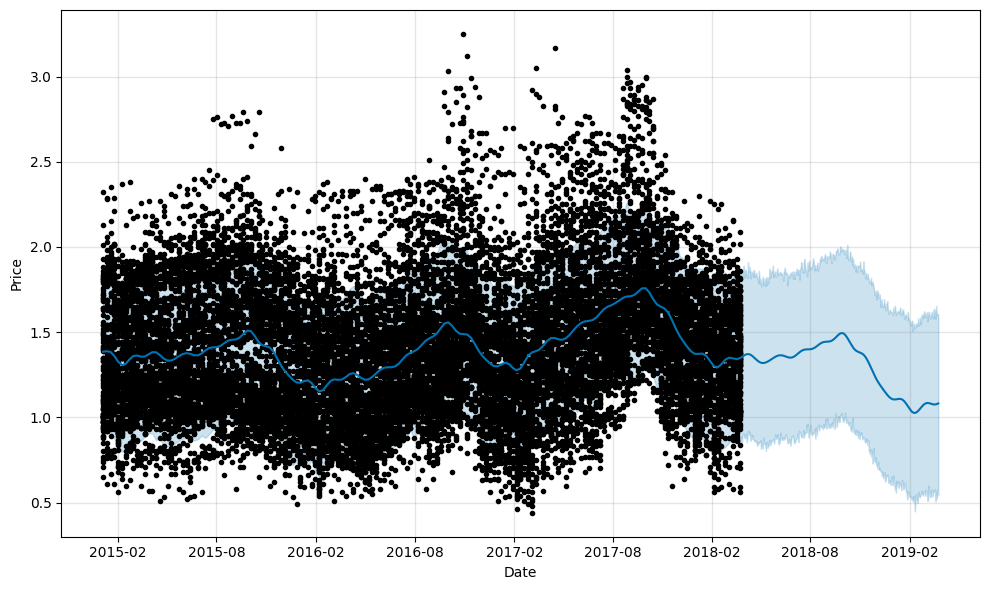

In [46]:

m.plot(forecast, xlabel = 'Date', ylabel = 'Price')
# xlabel = 'Date', ylabel = 'Price' : 라벨 바꿔주기

# 버그로 차트가 두개가 나옴
# 해결하는 팁

plt.savefig('fig1.jpg')
# 그린 차트를 jpg 파일로 저장하겠다
# 파일은 파일여는탭에 보면 저장되어있음. 다운로드받아서 쓰면 됨.

# 까만점은 실제 데이터
# 파란 선은 가격 평균



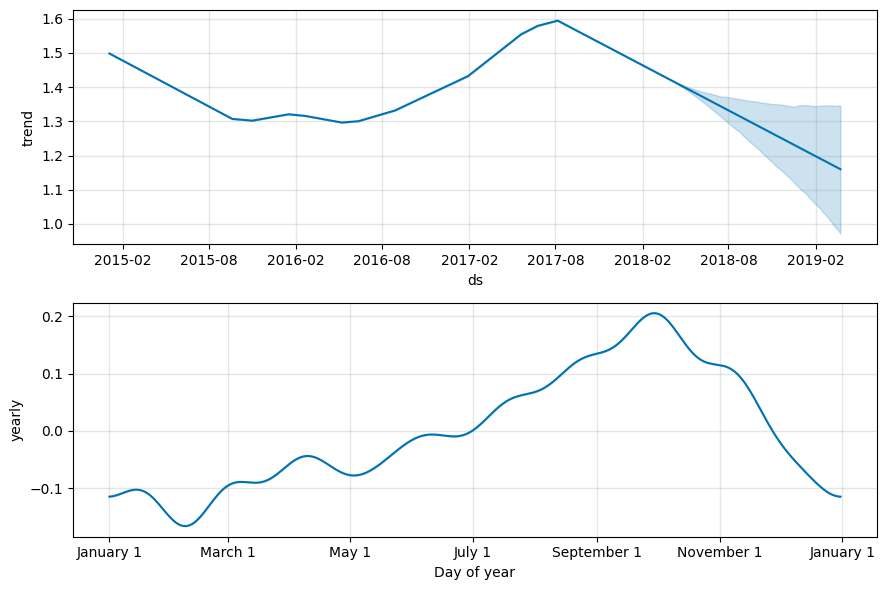

In [47]:
# 차트 다른거 하나 더 그려보기


m.plot_components(forecast)
plt.savefig('fig2.jpg')



### 데이터 예측 연습 - West 지역

In [ ]:

### 지금까지의 예측은 미국 지역 전체에 대한 데이터 예측.

### West 지역은 어떨지 예측해보

In [ ]:
## 분석 과정 정리 -----------------------------

# 어떤 데이터를 가져와야 할까

# 일단 웨스트 지역만 나오게 해서 변수로 저장하고
# 거기서 날짜별 가격 평균을 구하고
# 날짜컬럼과 가격컬럼을 가져와서 
# 프로펫 라이브러리를 사용해서 예측치를 구하고
# 이걸 차트로 그리고

# ---------------------------------------------


In [48]:
# 웨스트 지역만 확인하기

# 문제 - 웨스트지역은 어디까지인가
# 

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekday
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,6
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,6
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,6
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,6
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,6
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,6
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,6
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California,6


In [52]:
df.loc[  df['region'] == 'west',  ]

# 웨스트 라고 적힌 지역은 없음. 이제 내가 13개 주의 이름을 다 가져와서 해야하는건가?


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekday


In [57]:
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [59]:
# west가 아니라 West 였구나. 다시 검색해보기

df_west = df.loc[  df['region'] == 'West',  ]

# 잘 나옴. 이걸 변수로 저장.
df_west

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekday
51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West,6
51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West,6
50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West,6
50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West,6
49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West,6
1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West,6
1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West,6
0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West,6


In [60]:
# df_west 의 날짜와 가격 컬럼만 가져와서 다시 저장해주기

df_west_dp = df_west[  ['Date', 'AveragePrice']  ]
df_west_dp

,Date,AveragePrice
51,2015-01-04,1.40
51,2015-01-04,0.89
50,2015-01-11,1.39
50,2015-01-11,0.95
49,2015-01-18,0.96
...,...,...
2,2018-03-11,1.00
1,2018-03-18,1.73
1,2018-03-18,0.99
0,2018-03-25,0.93


In [61]:
# 컬럼명을 바꿔주기 - 컴이 인식하기 쉽도록

df_west_prophet = df_west_dp.rename(  columns =  { 'Date':'ds', 'AveragePrice':'y'}  )
df_west_prophet

,ds,y
51,2015-01-04,1.40
51,2015-01-04,0.89
50,2015-01-11,1.39
50,2015-01-11,0.95
49,2015-01-18,0.96
...,...,...
2,2018-03-11,1.00
1,2018-03-18,1.73
1,2018-03-18,0.99
0,2018-03-25,0.93


In [62]:
# 사용할 라이브러리를 변수로 저장

m_w = Prophet()

In [63]:
# 학습 시키기

m_w.fit(df_west_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97w8gtzc/1zp_21rn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97w8gtzc/3obwy12o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63679', 'data', 'file=/tmp/tmp97w8gtzc/1zp_21rn.json', 'init=/tmp/tmp97w8gtzc/3obwy12o.json', 'output', 'file=/tmp/tmp97w8gtzc/prophet_modelt41ikixj/prophet_model-20230601020917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
# 예측에 사용할 데이터프레임을 만든다

w_future = m.make_future_dataframe(periods = 365, freq = 'D' )
w_future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [65]:
# 예측한다

w_forecast = m.predict(w_future)
w_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498393,0.904218,1.868330,1.498393,1.498393,-0.113387,-0.113387,-0.113387,-0.113387,-0.113387,-0.113387,0.0,0.0,0.0,1.385006
1,2015-01-11,1.493232,0.902319,1.895773,1.493232,1.493232,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,0.0,0.0,0.0,1.388277
2,2015-01-18,1.488071,0.907405,1.876133,1.488071,1.488071,-0.104620,-0.104620,-0.104620,-0.104620,-0.104620,-0.104620,0.0,0.0,0.0,1.383451
3,2015-01-25,1.482910,0.889040,1.856272,1.482910,1.482910,-0.123559,-0.123559,-0.123559,-0.123559,-0.123559,-0.123559,0.0,0.0,0.0,1.359351
4,2015-02-01,1.477749,0.845658,1.799451,1.477749,1.477749,-0.151917,-0.151917,-0.151917,-0.151917,-0.151917,-0.151917,0.0,0.0,0.0,1.325832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.162880,0.538079,1.578838,0.989263,1.333488,-0.086234,-0.086234,-0.086234,-0.086234,-0.086234,-0.086234,0.0,0.0,0.0,1.076646
530,2019-03-22,1.162151,0.530112,1.621596,0.987634,1.333604,-0.084557,-0.084557,-0.084557,-0.084557,-0.084557,-0.084557,0.0,0.0,0.0,1.077593
531,2019-03-23,1.161422,0.558963,1.591709,0.986673,1.333558,-0.082607,-0.082607,-0.082607,-0.082607,-0.082607,-0.082607,0.0,0.0,0.0,1.078815
532,2019-03-24,1.160693,0.554293,1.584560,0.984441,1.333693,-0.080402,-0.080402,-0.080402,-0.080402,-0.080402,-0.080402,0.0,0.0,0.0,1.080291


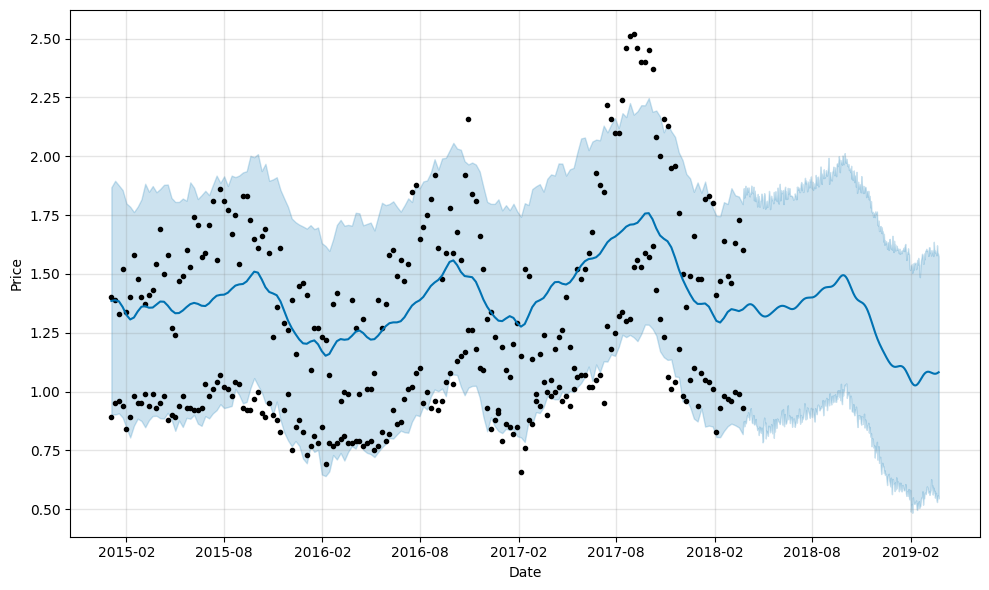

In [80]:
# 차트 그려보기 1

m_w.plot(w_forecast, xlabel = 'Date', ylabel = 'Price')
plt.savefig('fig3.jpg')


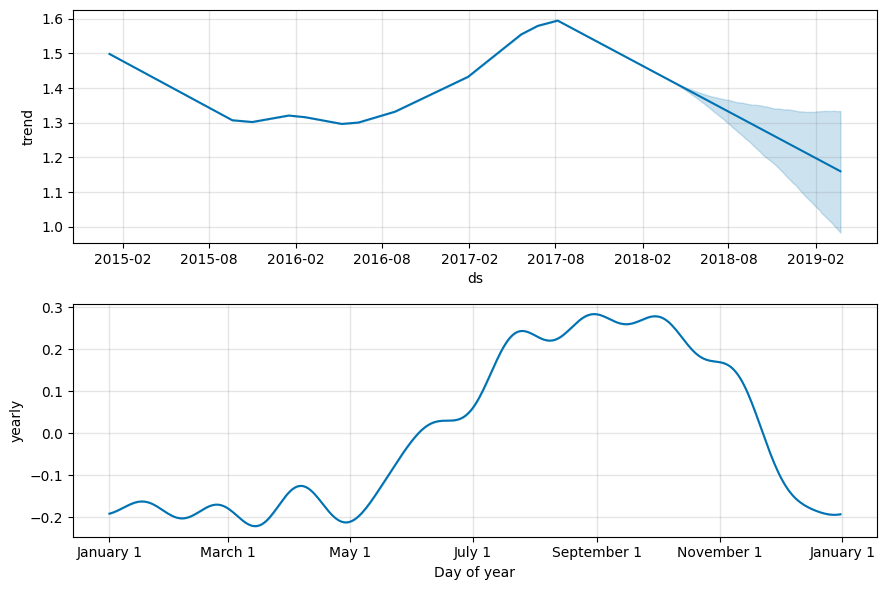

In [81]:
# 차트 그려보기 2

m_w.plot_components(w_forecast)
plt.savefig('fig4.jpg')


In [ ]:


######################### 해설 ###################################



In [69]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekday
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,6
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,6
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,6
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,6
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,6


In [70]:
df_west2 = df.loc[  df['region'] == 'West',   ]

In [72]:
df_prophet2 = df_west2[  ['Date', 'AveragePrice']]
df_prophet2

,Date,AveragePrice
51,2015-01-04,1.40
51,2015-01-04,0.89
50,2015-01-11,1.39
50,2015-01-11,0.95
49,2015-01-18,0.96
...,...,...
2,2018-03-11,1.00
1,2018-03-18,1.73
1,2018-03-18,0.99
0,2018-03-25,0.93


In [73]:
df_prophet2.rename( columns = { 'Date': 'ds', 'AveragePrice': 'y'}, inplace = True)
df_prophet2

<ipython-input-73-d3335582b1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet2.rename( columns = { 'Date': 'ds', 'AveragePrice': 'y'}, inplace = True)


,ds,y
51,2015-01-04,1.40
51,2015-01-04,0.89
50,2015-01-11,1.39
50,2015-01-11,0.95
49,2015-01-18,0.96
...,...,...
2,2018-03-11,1.00
1,2018-03-18,1.73
1,2018-03-18,0.99
0,2018-03-25,0.93


In [74]:
m2 = Prophet()

In [ ]:
m2.fit(df_prophet2)

In [76]:
future2 = m2.make_future_dataframe(periods = 365, freq = 'D')

In [77]:
forecast2 = m2.predict(future2)

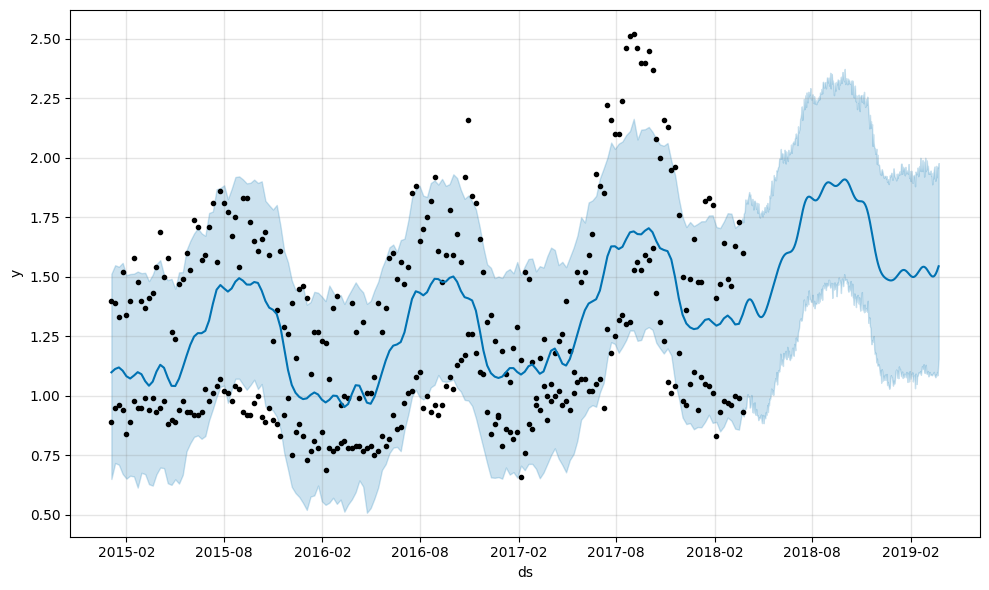

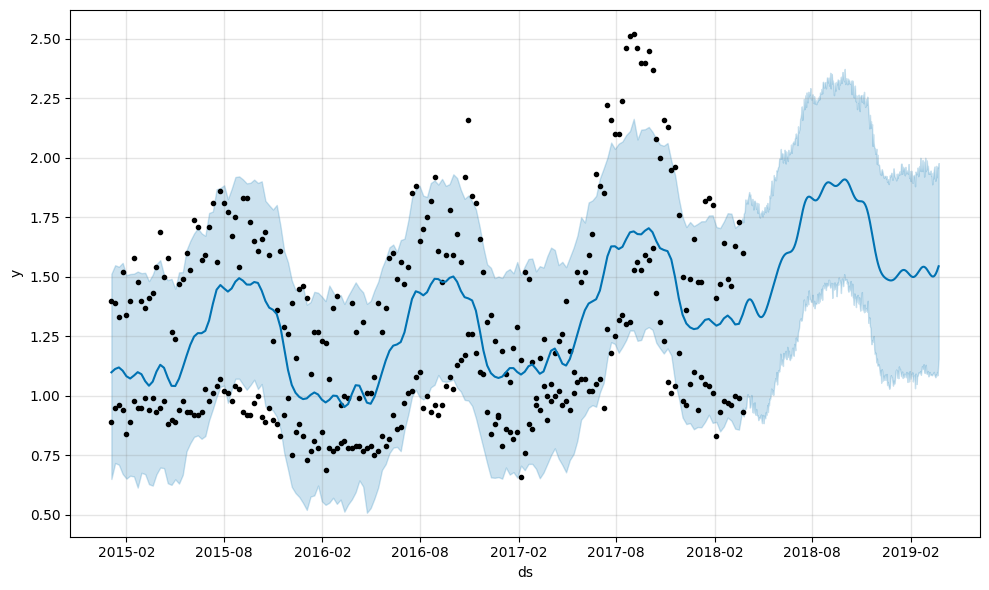

In [78]:
m2.plot(forecast2)

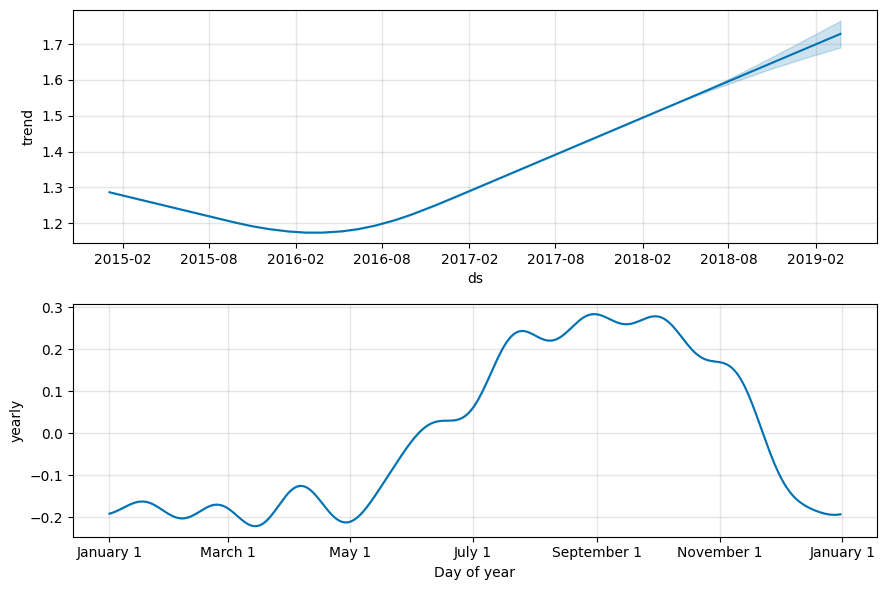

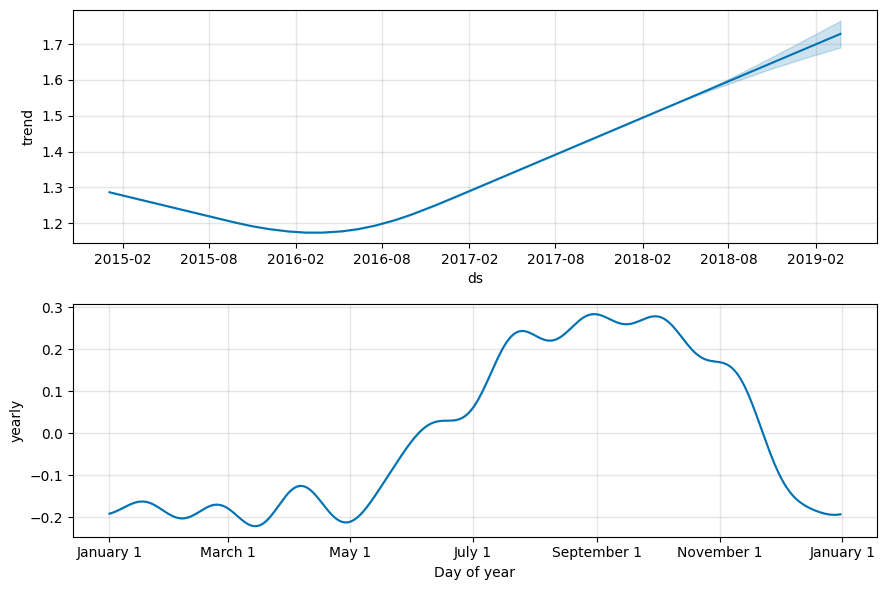

In [79]:
m2.plot_components(forecast2)